In [10]:
import pandas as pd
import numpy as np
import pyreadstat as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2024 3T\[MT06] Microeconometría I\Clases\Clase 2\Archivos Stata-20241002\MROZ1.dta"

df, meta = st.read_dta(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lfp               753 non-null    int64  
 1   whrs              753 non-null    int64  
 2   kl6               753 non-null    int64  
 3   k618              753 non-null    int64  
 4   wa                753 non-null    int64  
 5   we                753 non-null    int64  
 6   ww                753 non-null    float64
 7   rpwg              753 non-null    float64
 8   hhrs              753 non-null    int64  
 9   ha                753 non-null    int64  
 10  he                753 non-null    int64  
 11  hw                753 non-null    float64
 12  faminc            753 non-null    int64  
 13  mtr               753 non-null    float64
 14  wmed              753 non-null    int64  
 15  wfed              753 non-null    int64  
 16  un                753 non-null    float64
 1

In [4]:
df.head(1)

,lfp,whrs,kl6,k618,wa,we,ww,rpwg,hhrs,ha,...,hw,faminc,mtr,wmed,wfed,un,cit,ax,salario_ofrecido,salhat
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,4.0288,16310,0.7215,12,7,5.0,0,14,3.761177,0.550029


In [5]:
df['lfp'].value_counts()

lfp
1    428
0    325
Name: count, dtype: int64

In [8]:
df['const'] = 1

import statsmodels.api as sm
X = df[['const', 'salario_ofrecido']]  # Variable independiente con constante
y = df['lfp']  # Variable dependiente

# Ajustar el modelo logístico
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.657445
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    lfp   No. Observations:                  753
Model:                          Logit   Df Residuals:                      751
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Oct 2024   Pseudo R-squ.:                 0.03849
Time:                        18:55:30   Log-Likelihood:                -495.06
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 3.062e-10
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3784      0.284     -4.853      0.000      -1.935      -0.822
salario_ofrecido     0.4225      0.071      5.986      0.000       0.284       0.561
====================================================================================
"""

In [9]:
# from sklearn.linear_model import LogisticRegression

# # Supongamos que tienes un DataFrame llamado 'df' con las columnas 'lfp' y 'salario_ofrecido'
# X = df[['salario_ofrecido']]  # Variables independientes
# y = df['lfp']  # Variable dependiente

# # Crear el modelo de regresión logística
# logit_model = LogisticRegression()

# # Ajustar el modelo a todos los datos
# logit_model.fit(X, y)

# # Predecir los valores
# y_pred = logit_model.predict(X)

# # Imprimir el coeficiente y el intercepto del modelo
# print("Intercepto:", logit_model.intercept_)
# print("Coeficiente de 'salario_ofrecido':", logit_model.coef_)

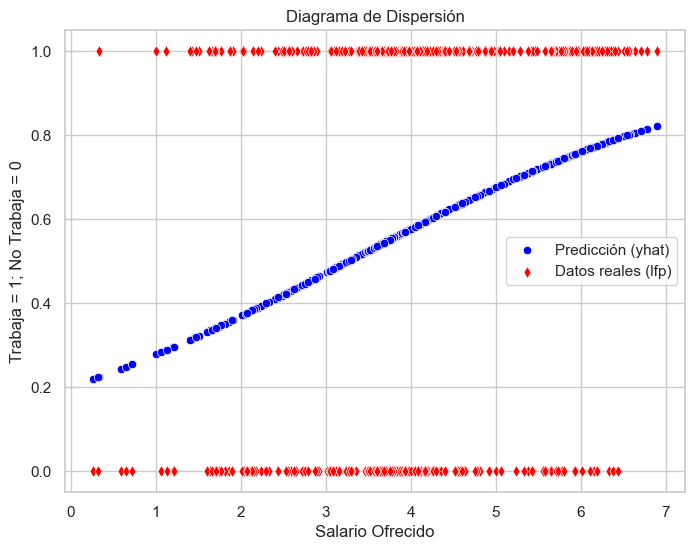

In [23]:
df['yhat'] = result.predict(X)

# Configurar estilo
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))

# Graficar los valores predichos (yhat) vs salario_ofrecido, y la variable lfp (con msymbol similar a 'O' para los puntos)
sns.scatterplot(x='salario_ofrecido', y='yhat', data=df, label='Predicción (yhat)', marker='o', color='blue')
sns.scatterplot(x='salario_ofrecido', y='lfp', data=df, label='Datos reales (lfp)', marker='d', color='red')

# Títulos y etiquetas
plt.title("Diagrama de Dispersión")
plt.ylabel("Trabaja = 1; No Trabaja = 0")
plt.xlabel("Salario Ofrecido")

# Limitar los valores del eje Y a [0, 1] para la variable dependiente binaria
plt.ylim(-0.05, 1.05)

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

In [25]:
# Calcular los efectos marginales (mfx en Stata)
margins = result.get_margeff(at='mean')

# Mostrar los resultados de los efectos marginales
print(margins.summary())

        Logit Marginal Effects       
Dep. Variable:                    lfp
Method:                          dydx
At:                              mean
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
salario_ofrecido     0.1034      0.017      6.000      0.000       0.070       0.137


In [26]:
odds_ratios = pd.DataFrame({
    'Variables': X.columns,
    'Odds Ratios': result.params.apply(lambda x: np.exp(x))
})

# Mostrar los odds ratios
print(odds_ratios)

                         Variables  Odds Ratios
const                        const     0.251989
salario_ofrecido  salario_ofrecido     1.525841


In [27]:
# Calcular los odds ratios (exponenciar los coeficientes)
odds_ratios = np.exp(result.params)

# Calcular los intervalos de confianza (exponenciar los intervalos)
conf = np.exp(result.conf_int())
conf.columns = ['2.5%', '97.5%']  # Etiquetas de los intervalos de confianza

# Crear un DataFrame para mostrar los odds ratios, intervalos de confianza y p-valores
summary_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    '2.5%': conf['2.5%'],
    '97.5%': conf['97.5%'],
    'P-value': result.pvalues
})

# Mostrar la tabla resumen
print(summary_df)

                  Odds Ratio      2.5%     97.5%       P-value
const               0.251989  0.144415  0.439693  1.216877e-06
salario_ofrecido    1.525841  1.328702  1.752230  2.145850e-09


In [28]:
# Calcular los efectos marginales (mfx en Stata)
margins = result.get_margeff()

# Mostrar los resultados de los efectos marginales
print(margins.summary())

        Logit Marginal Effects       
Dep. Variable:                    lfp
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
salario_ofrecido     0.0984      0.015      6.597      0.000       0.069       0.128
